In [1]:
import tensorflow as tf

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dog_cat_photos/train",
    image_size=(96, 96),
    label_mode="binary",
    batch_size=32,
    shuffle=True
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dog_cat_photos/test",
    image_size=(96, 96),
    label_mode="binary",
    batch_size=32,
    shuffle=False
)

Found 300 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


In [2]:
class_names = train_dataset.class_names
class_names

['cat', 'dog']

In [3]:
train_dataset_lr = train_dataset.map(lambda image, label: (tf.image.flip_left_right(image), label))
train_dataset_ud = train_dataset.map(lambda image, label: (tf.image.flip_up_down(image), label))
train_dataset_rot90 = train_dataset.map(lambda image, label: (tf.image.rot90(image), label))
train_dataset_rot180 = train_dataset.map(lambda image, label: (tf.image.rot90(image, k=2), label))
train_dataset_rot270 = train_dataset.map(lambda image, label: (tf.image.rot90(image, k=3), label))

In [4]:
train_dataset = train_dataset.concatenate(train_dataset_lr)
train_dataset = train_dataset.concatenate(train_dataset_ud)
train_dataset = train_dataset.concatenate(train_dataset_rot90)
train_dataset = train_dataset.concatenate(train_dataset_rot180)
train_dataset = train_dataset.concatenate(train_dataset_rot270)

In [5]:
train_dataset = train_dataset.shuffle(32)

2025-08-04 19:05:50.047706: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


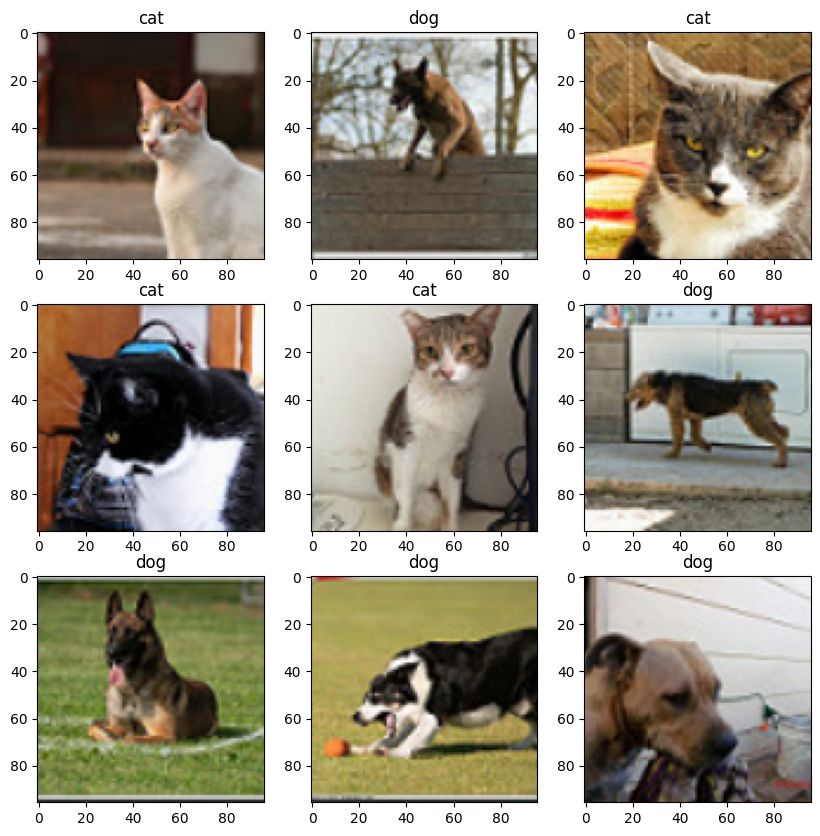

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy().astype("uint8")[0]])

In [7]:
input_layer = tf.keras.Input(shape=(96, 96, 3))
l_layer = tf.keras.applications.mobilenet_v2.preprocess_input(input_layer)

base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(96, 96, 3),
    input_tensor=l_layer,
    include_top=False,
    weights="imagenet",
    pooling='avg'
)

base_model.trainable = False

In [8]:
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')

In [9]:
model = tf.keras.Sequential([
    base_model,
    output_layer
])

In [10]:
model.compile(optimizer="adam",loss='binary_crossentropy',metrics=["accuracy"])

In [11]:
model.fit(train_dataset, epochs=15)

Epoch 1/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8333 - loss: 0.3562
Epoch 2/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9394 - loss: 0.1629
Epoch 3/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9639 - loss: 0.1221
Epoch 4/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9783 - loss: 0.0974
Epoch 5/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9817 - loss: 0.0781
Epoch 6/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9872 - loss: 0.0653
Epoch 7/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9922 - loss: 0.0562
Epoch 8/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9917 - loss: 0.0494
Epoch 9/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9956 - loss: 0.0439
Epoch 10/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9978 - loss: 0.0377
Epoch 11/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9978 - loss: 0.0342
Epoch 12/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy:

In [13]:
pred_data = model.predict(test_dataset)
pred_data

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[2.9299613e-03],
       [5.6856457e-04],
       [8.4325475e-05],
       [3.5643211e-04],
       [1.8253193e-03],
       [7.4287504e-03],
       [4.5868257e-04],
       [1.3910623e-03],
       [5.1858244e-03],
       [4.0969229e-04],
       [3.6406508e-04],
       [2.9852154e-02],
       [1.8832620e-03],
       [1.0068328e-01],
       [4.9563748e-04],
       [8.8673719e-04],
       [4.4017297e-01],
       [1.4970347e-03],
       [6.4147648e-04],
       [6.1164511e-04],
       [2.7923886e-04],
       [7.4486025e-03],
       [2.7684963e-04],
       [2.8157944e-04],
       [5.4823792e-01],
       [5.9769931e-04],
       [4.4737863e-03],
       [4.5975042e-04],
       [2.2378153e-01],
       [2.7488773e-03],
       [1.9611719e-03],
       [3.9149204e-01],
       [1.6325370e-05],
       [8.6363161e-04],
       [1.9101941e-03],
       [5.0007176e-01],
       [1.6133240e-01],
       [5.9975311e-05],
       [2.7144824e-03],
       [1.4215579e-03],
       [1.9638229e-03],
       [1.717692

In [14]:
model.evaluate(test_dataset)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9800 - loss: 0.0381


[0.03805436193943024, 0.9800000190734863]